In [1]:
import numpy as np
import sklearn
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('classic')

## 중심극한정리
#### 표본을 많이 추출할수록 표본의 분포는 정규분포에 가까워진다.

In [2]:
loans_income = pd.read_csv("data/loans_income.csv").squeeze('columns')

sample_data = loans_income.sample(1000)
sample_data.name = 'Data' 
sample_mean_05 = pd.Series([loans_income.sample(5).mean() for _ in range(1000)])
sample_mean_05.name = "Mean of 5"
sample_mean_20 = pd.Series([loans_income.sample(20).mean() for _ in range(1000)])
sample_mean_20.name = "Mean of 20"
datas = [sample_data,sample_mean_05,sample_mean_20]


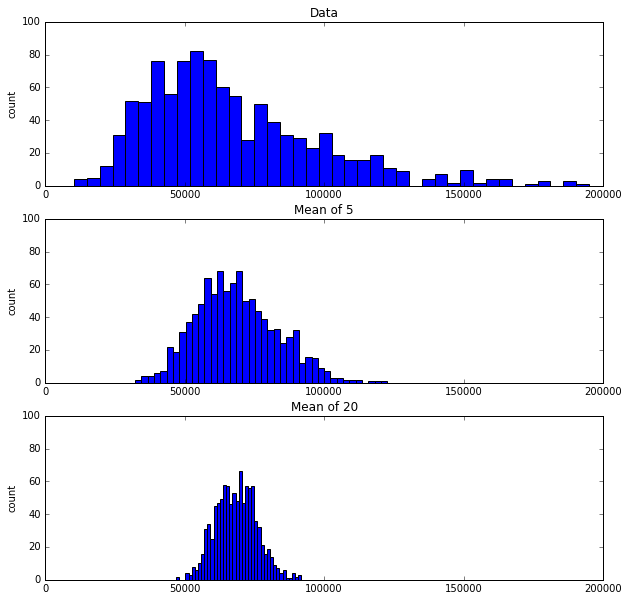

In [3]:
fig, axes = plt.subplots(3,1, figsize = (10,10))

for data, ax in zip(datas, axes.ravel()) :
    ax.hist(data, bins = 40)
    ax.set_xlim(0,200000)
    ax.set_ylim(0,100)
    ax.set_title(data.name)
    ax.set_ylabel('count')
plt.show()

## 부트스트랩
#### 표본을 복원추출하여 큰 데이터 집합을 만들고 그 데이터 집합에서 다시 표본을 추출하는 것을 말함

In [4]:
from sklearn.utils import resample

results = []

# resample는 데이터에서 같은 크기로 복원추출한다.
for _ in range(1000) :
    sample = resample(loans_income)
    results.append(sample.median())
results = pd.Series(results)

print("Bootstrap Statistics : ")
print(f"original : {loans_income.median()}")
print(f"bias : {results.mean() - loans_income.median()}")
print(f"std. error : {results.std()}")

Bootstrap Statistics : 
original : 62000.0
bias : -80.80000000000291
std. error : 220.39905681341796


### 신뢰 수준(confidence level) : 관심 통계량을 포함할 것이라 예상되는 신뢰구간의 백분율
### 신뢰 구간(confidence interval) : 관심 통계량이 어느 구간에 있는지 확률적으로 보이는 방법

#### 예
#### "신뢰수준 95%에서 투표자의 35%~45%가 A후보를 지지하고 있다."라고 할 때 95%는 신뢰수준이고 35%~45%는 신뢰구간이며 관심 통계량은 A후보의 지지율이다.[wiki](https://ko.wikipedia.org/wiki/신뢰구간)

모집단 평균 :  68760.51844
샘플(20개)의 평균 :  55734.1


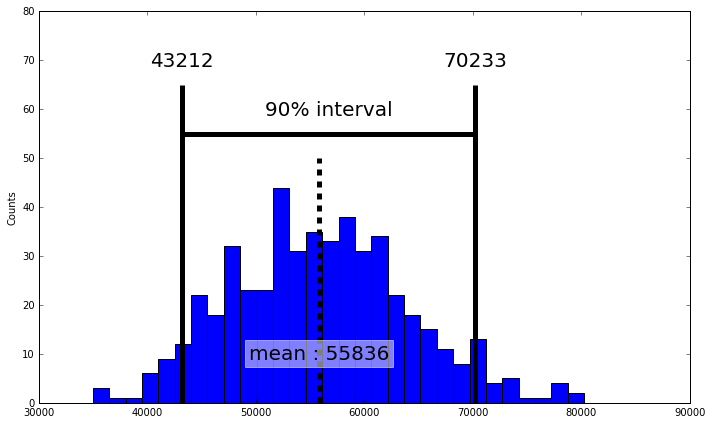

In [53]:
print("모집단 평균 : ", loans_income.mean())
np.random.seed(seed=3)  
# create a sample of 20 loan income data
sample20 = resample(loans_income, n_samples=20, replace=False)
print("샘플(20개)의 평균 : ", sample20.mean())
results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)

confidence_interval = list(results.quantile([0.05, 0.95]))

plt.figure(figsize = (10,6))
plt.hist(results, bins = 30)
plt.plot(confidence_interval, [55,55], color = 'black', linewidth = 5)
plt.vlines(confidence_interval, 0,65, color = 'black', linewidth = 5)

for x in confidence_interval :
    plt.text(x, 70, f"{x:.0f}", fontdict={'fontsize' : 20},
             horizontalalignment='center', verticalalignment='center')
plt.text(sum(confidence_interval) / 2, 60, '90% interval',
        horizontalalignment='center', verticalalignment='center',fontdict={'fontsize' : 20})
meanIncome = results.mean()
plt.vlines(meanIncome, 0,50,color = 'black', linewidth = 5, linestyles='--')
plt.text(meanIncome, 10, f"mean : {meanIncome :.0f}", bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center',fontdict={'fontsize' : 20} )
plt.ylim(0,80)
plt.ylabel('Counts')

plt.tight_layout()
plt.show()

In [10]:
results

0      47060.0
1      52950.0
2      63918.2
3      40156.0
4      46462.0
        ...   
495    56667.4
496    45006.0
497    69932.2
498    57899.1
499    58564.1
Length: 500, dtype: float64